# Web安全之机器学习
## 第9章 支持向量机算法
### 9.1 SVM原理简介
当给定数据集的时候，**SVM的优化目标函数如下：**
![](https://yunlongs-1253041399.cos.ap-chengdu.myqcloud.com/image/Stanford/lecture-8-12.jpg)

**其对偶形式如下：**
![](https://yunlongs-1253041399.cos.ap-chengdu.myqcloud.com/image/Stanford/lecture-8-14.jpg)

**通过SMO算法学习得到参数$\alpha$后，预测公式如下：**
![](https://yunlongs-1253041399.cos.ap-chengdu.myqcloud.com/image/Stanford/lecture-7-27.jpg)

### 9.2 Hello World!SVM

**SVM函数申明如下：**
>https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

```sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)```

**参数：**
- C : 错误项的惩罚参数。默认1.0
- kernel：选择的核函数，为‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable中的一个，默认'rbf'。
- degree：核函数‘poly’多项式的度。
- gamma： ‘rbf’, ‘poly’ and ‘sigmoid’核函数的系数。'auto'为1 / n_features, ，‘scale’为1 / (n_features * X.var()) 。(default=’auto’)
- coef0：核函数的插入项。仅在 ‘poly’ and ‘sigmoid’起作用。(default=0.0)
- shrinking：是否适用收缩时启发。 (default=True)
- probability：是否启用概率估计。(default=False)
- tol：停止迭代的容忍参数。(default=1e-3)
- cache_size：明确Kernel的缓冲大小。
- class_weight ：每一个分类的权重。
- verbose：是否显示输出过程
- max_iter：最大迭代的次数。(default=-1)无限制
- decision_function_shape
- random_state :打乱样本所使用的伪随机数发生器。

**属性：**
- support_：支持向量的索引
- support_vectors_：支持向量
- n_support_：每一类支持向量的个数
- dual_coef_ :在决策函数中支持向量的系数
- coef_ ：分配给每一个特征的系数，仅在线性核时使用。
- intercept_：决策函数中的常数。
- fit_status_：拟合的状态。0 if 正确拟合, 1 otherwise (will raise warning)
- probA_：
- probB_：

1.导入库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

2.生成随机样本点

In [2]:
X = np.vstack((np.random.randn(20,2)-[2,2],np.random.randn(20,2)+[2,2]))
Y = [0]*20+[1]*20

3.数据拟合

In [3]:
clf = svm.SVC(kernel='linear')
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

4.画出分割超平面

由$W^Tx+b =0$可得，$w_0x_0+w_1x_1+b=0$,从而推导出$x_1 = -\frac{b}{w_1} - \frac{w_0}{w_1}x_0$

In [4]:
w = clf.coef_[0]
a= -w[0] / w[1]
xx = np.linspace(-5,5)
yy = a*xx - (clf.intercept_[0]) / w[1]

5.画出支持向量所在的两个平面

已知一个支持向量坐标(b[0],b[1])，由点斜式可得：$b[1] = ab[0]+b$，推导出$b = b[1]-ab[0]$

In [5]:
b = clf.support_vectors_[0]
yy_down = a*xx +(b[1]-a*b[0])
b = clf.support_vectors_[-1]
yy_up = a*xx +(b[1] - a*b[0])

6.调用matplotlib画图

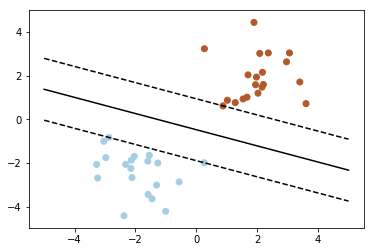

In [6]:
plt.plot(xx,yy,'k-')
plt.plot(xx,yy_up,'k--')
plt.plot(xx,yy_down,'k--')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s= 80,facecolors = 'none')
plt.scatter(X[:,0],X[:,1],c= Y,cmap = plt.cm.Paired)
plt.axis('tight')
plt.show()